<a href="https://colab.research.google.com/github/TanyaPat01/Generate-Challan/blob/hel-det/Helmet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 6.6 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.00GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HWPEnKeUJFs1zJb9NNZ1")
project = rf.workspace("bike-helmets").project("bike-helmet-detection-2vdjo")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.222, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Bike-Helmet-Detection-1 in yolov8:: 100%|██████████| 2754/2754 [00:00<00:00, 8674.20it/s]


In [10]:
from PIL import Image

folder_path = '/content/Bike-Helmet-Detection-1/train/images'  # Replace this with the path to your folder

# Get a list of files in the folder
files = os.listdir(folder_path)

# Filter the list to include only image files (you might need to modify this depending on your file types)
image_files = [f for f in files if f.endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp'))]

# Iterate through the image files and get their sizes
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    with Image.open(image_path) as img:
        width, height = img.size
        print(f"Image: {image_file}, Width: {width}, Height: {height}")


Image: BikesHelmets672_png_jpg.rf.23ad1bd3a0f9e0174603ca0fb9c456d1.jpg, Width: 416, Height: 416
Image: BikesHelmets254_png_jpg.rf.da550516ba64491e013b26d8d9fae8f3.jpg, Width: 416, Height: 416
Image: BikesHelmets16_png_jpg.rf.b02be194ef828a93cbdefd6c90820942.jpg, Width: 416, Height: 416
Image: BikesHelmets687_png_jpg.rf.e3634608bbb425ba8c4f4f19bcebbb15.jpg, Width: 416, Height: 416
Image: BikesHelmets331_png_jpg.rf.567d6088b212f4331d31ed3e9dc7a5a9.jpg, Width: 416, Height: 416
Image: BikesHelmets110_png_jpg.rf.f67e23c115bd9f27970bde6d9bf40d39.jpg, Width: 416, Height: 416
Image: BikesHelmets600_png_jpg.rf.b17e955c869257d3d3fc7a67fc81f8b7.jpg, Width: 416, Height: 416
Image: BikesHelmets190_png_jpg.rf.17854a3cc51f6210d02c4fae171dee4f.jpg, Width: 416, Height: 416
Image: BikesHelmets686_png_jpg.rf.7746b16649a94f45fdc764101a63a186.jpg, Width: 416, Height: 416
Image: BikesHelmets58_png_jpg.rf.ac15a38ca3033c2d86b2388d3852851f.jpg, Width: 416, Height: 416
Image: BikesHelmets522_png_jpg.rf.7524df0d

In [13]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=224 plots=True

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Bike-Helmet-Detection-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

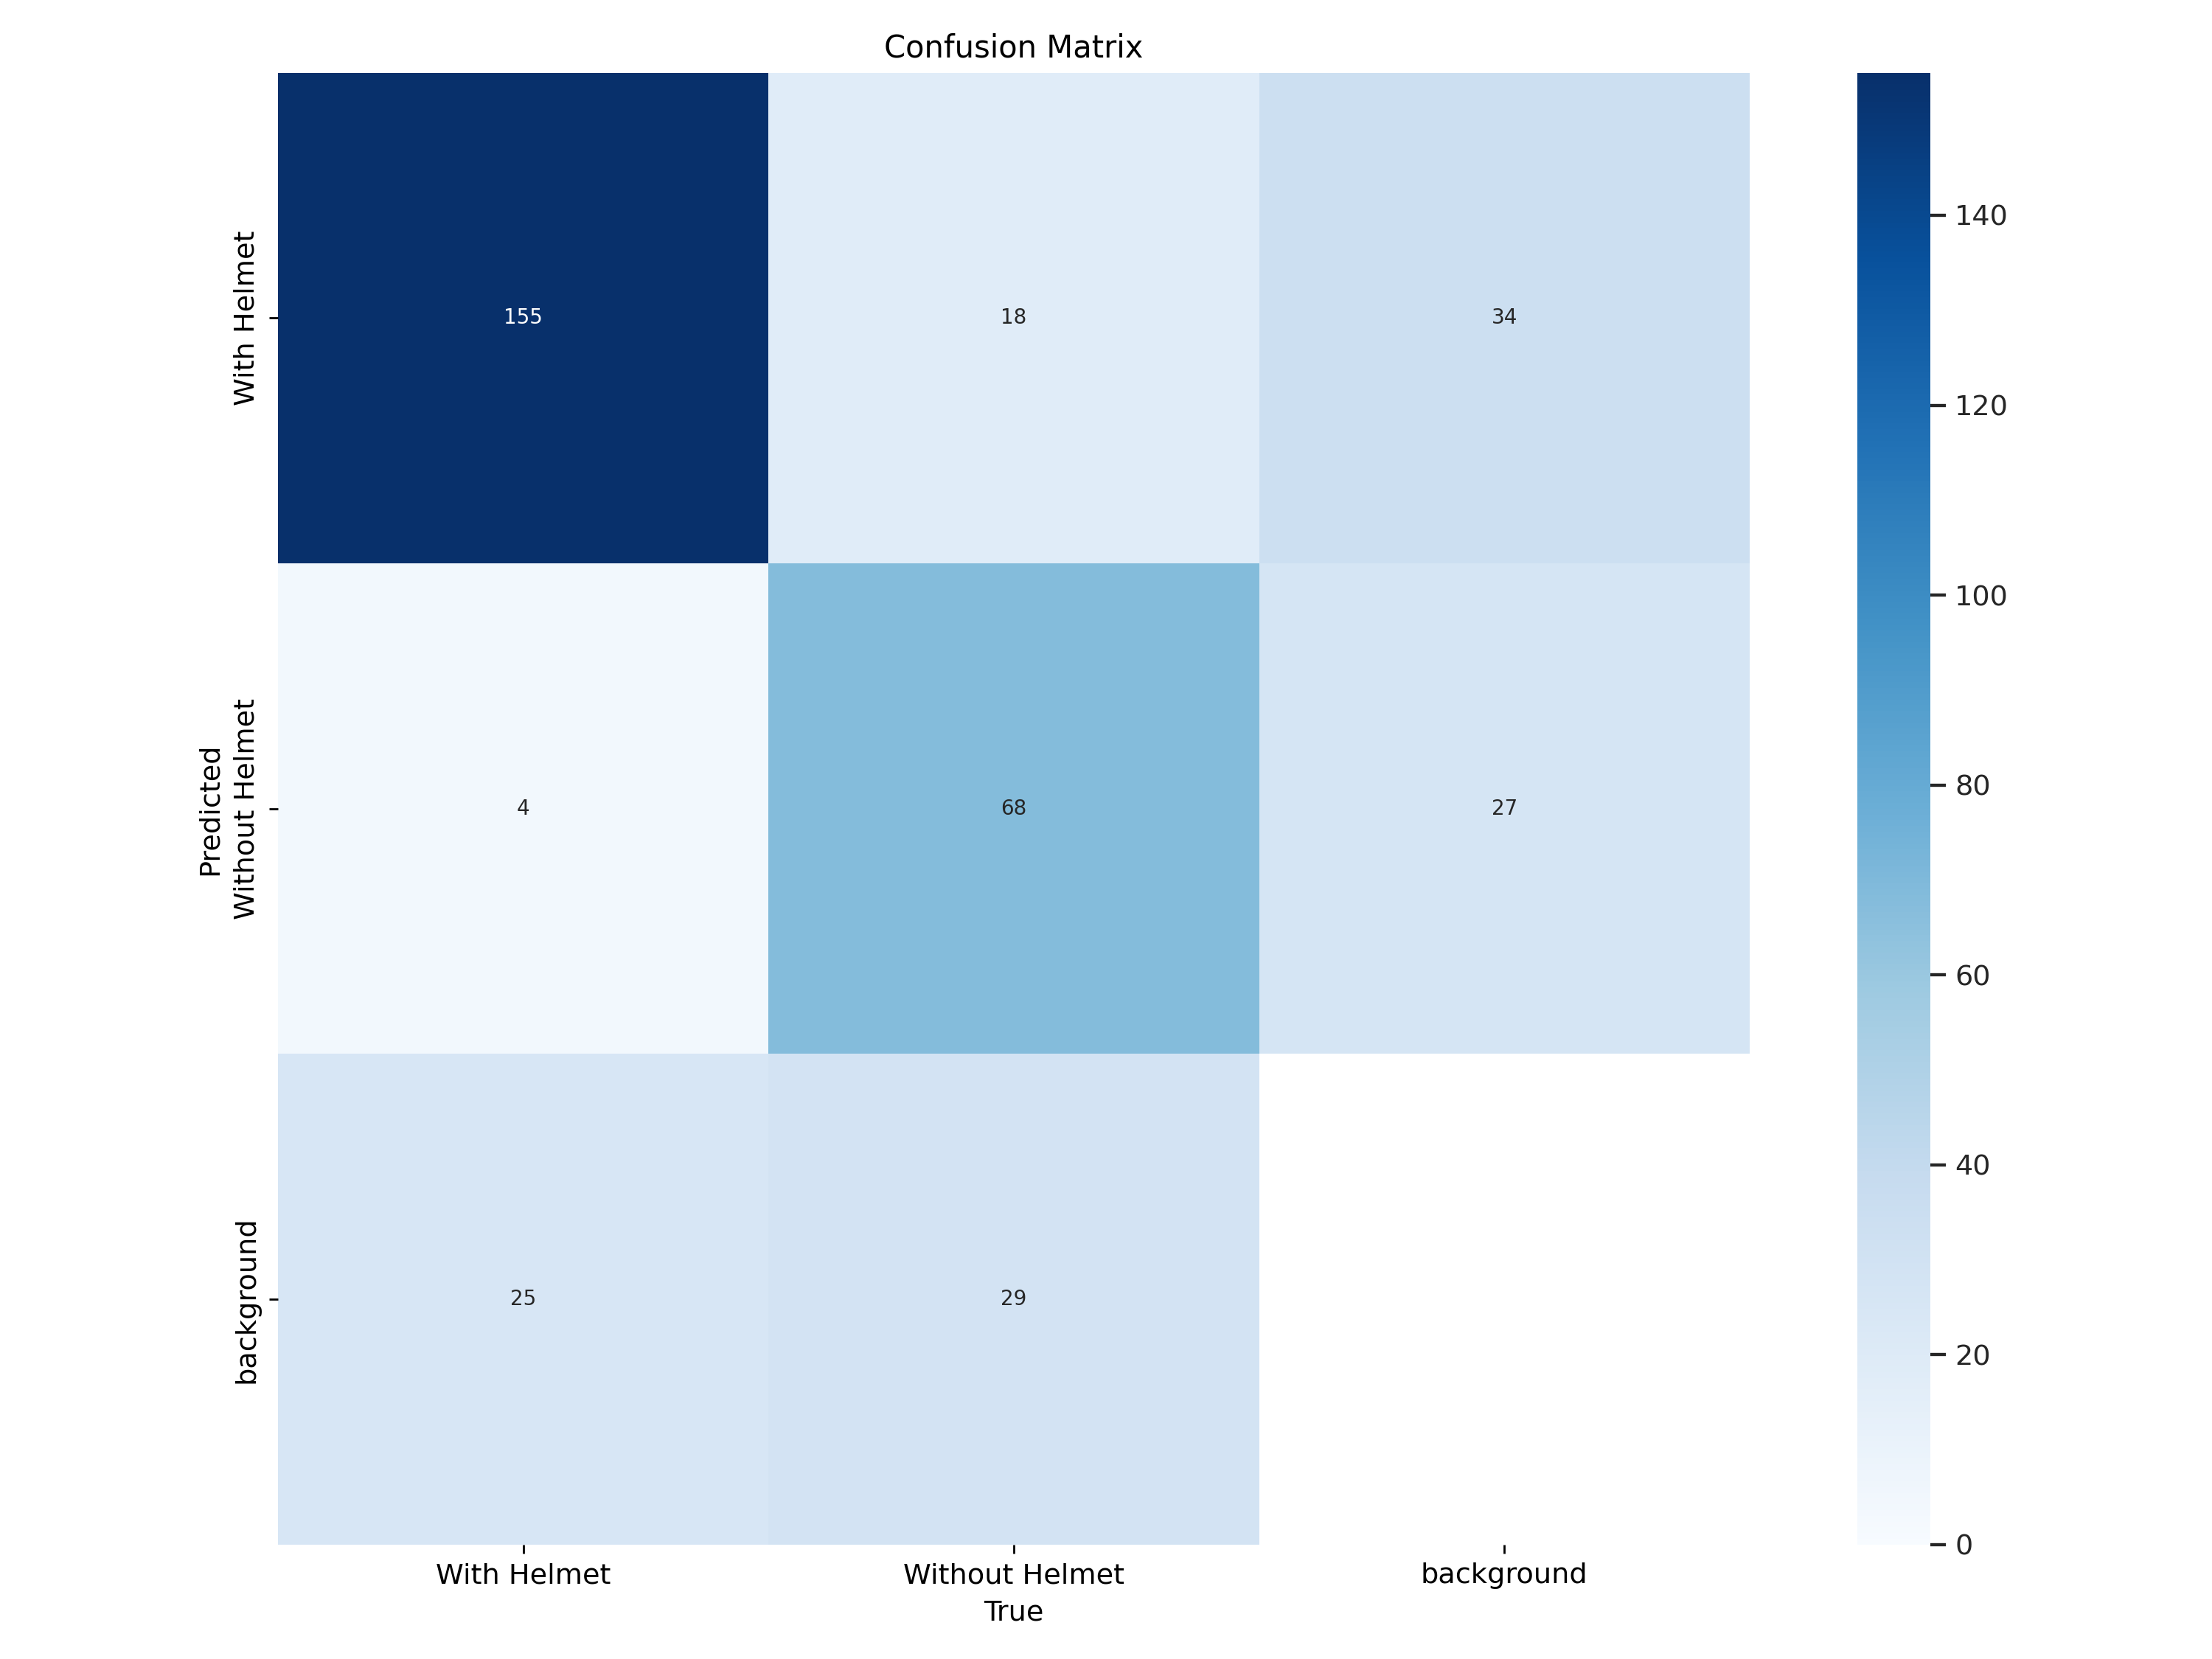

In [14]:
from IPython.display import Image
Image(filename= f'/content/runs/detect/train3/confusion_matrix.png',width = 1200, height=800)

In [15]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Bike-Helmet-Detection-1/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100% 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.06it/s]
                   all        126        299      0.744      0.716      0.758      0.408
           With Helmet        126        184      0.767      0.826      0.878      0.506
        Without Helmet        126        115      0.721      0.606      0.638      0.311
Speed: 0.7ms preprocess, 8.1ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [17]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt  data={dataset.location}/data.yaml

WARNING ⚠️ 'source' is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 224x192 1 Without Helmet, 104.2ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 128x224 1 With Helmet, 93.2ms
Speed: 0.9ms preprocess, 98.7ms inference, 4.8ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [24]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/runs/detect/train3/weights/best.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(['/content/drive/MyDrive/dataset/images/train/000022.jpg'])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs


0: 224x192 1 With Helmet, 27.6ms
Speed: 1.0ms preprocess, 27.6ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 192)
